# Fantano Review Notebook 2 - Visualizations

*In this project*, I will analyze and visualize data of albums rated by "The Internet's Busiest Music Nerd," Anthony Fantano. I will eventually create a Neural Network to predict ratings that Fantano would give to albums.

*In this second notebook*, I will make some visualizations from my combined fantano reviews / spotify data CSV. These visualizations will give a sense of what the data looks like and help guide my Machine Learning model in the next notebook.

# Step 1 - Import and inspect the CSV

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
sns.set(font_scale=1.25)
sns.set_palette('Accent')


%matplotlib inline 

In [2]:
data = pd.read_csv('fantano_spotify.csv')
data.head()

,Unnamed: 0,artist_name,album_name,spotify_id,popularity,duration_ms,tempo,loudness,instrumentalness,acousticness,...,tempo_standard_dev,loudness_standard_dev,instrumentalness_standard_dev,acousticness_standard_dev,speechiness_standard_dev,liveness_standard_dev,danceability_standard_dev,energy_standard_dev,valence_standard_dev,score
0,0,"""Weird Al"" Yankovic",Mandatory Fun,36jlZKG1sNZQA2HbWdYveV,51.0,227201.083333,134.414417,-9.953667,0.000000,0.083333,...,31.235458,2.147683,0.000000,0.288675,0.109117,0.0,0.178058,0.179098,0.226669,7.0
1,1,(Sandy) Alex G,Beach Music,0aABjw7BY2iRsK4ZdkwSjF,48.0,171639.076923,112.474923,-11.217231,0.153846,0.384615,...,26.156683,1.865558,0.375534,0.506370,0.004761,0.0,0.163336,0.128091,0.261598,6.0
2,2,(Sandy) Alex G,Rocket,5Pq92omNLyQgGGrj2u4pur,50.0,179333.642857,128.357714,-7.042714,0.285714,0.214286,...,32.653342,2.149563,0.468807,0.425815,0.072109,0.0,0.152455,0.197175,0.180167,5.0
3,3,2 Chainz,Based On A T.R.U. Story,5fL5QvYTODefwIrQVAHa0f,36.0,250958.923077,135.056692,-5.171385,0.000000,0.076923,...,14.662922,1.466928,0.000000,0.277350,0.083065,0.0,0.114408,0.129510,0.256612,4.0
4,4,21 Savage,Issa Album,1GeQZeg77rUX8s0pEiz8jS,39.0,242553.500000,129.126643,-10.567214,0.142857,0.071429,...,33.867507,1.623469,0.363137,0.267261,0.092056,0.0,0.065064,0.110153,0.145041,3.0


In [3]:
# We can't see all of the column names in the above table, so I have listed them here for reference

data.columns.values

array(['Unnamed: 0', 'artist_name', 'album_name', 'spotify_id',
       'popularity', 'duration_ms', 'tempo', 'loudness',
       'instrumentalness', 'acousticness', 'speechiness', 'liveness',
       'danceability', 'energy', 'valence', 'key', 'mode',
       'time_signature', 'duration_ms_standard_dev', 'tempo_standard_dev',
       'loudness_standard_dev', 'instrumentalness_standard_dev',
       'acousticness_standard_dev', 'speechiness_standard_dev',
       'liveness_standard_dev', 'danceability_standard_dev',
       'energy_standard_dev', 'valence_standard_dev', 'score'],
      dtype=object)

# Step 2 - Search for correlations between features and labels

I am interested in how each feature correlates to the label (score). Since we have so many features, the best way quickly see the correlations between each feature and the label is with the pandas .corr function.

In [4]:
data[data.columns[4:-3]].apply(lambda x: x.corr(data['score']))

popularity                      -0.184927
duration_ms                      0.068616
tempo                           -0.007245
loudness                        -0.040238
instrumentalness                 0.160555
acousticness                     0.045277
speechiness                     -0.016347
liveness                         0.033593
danceability                    -0.149702
energy                           0.012754
valence                         -0.038919
key                              0.001267
mode                             0.082510
time_signature                  -0.015598
duration_ms_standard_dev         0.075961
tempo_standard_dev               0.028707
loudness_standard_dev           -0.008023
instrumentalness_standard_dev    0.054860
acousticness_standard_dev       -0.040851
speechiness_standard_dev        -0.063007
liveness_standard_dev            0.006846
danceability_standard_dev       -0.030351
dtype: float64

Unfortunately for my model, there doesn't seem to be strong linear correlations between any of the features and the 'score' label. However, let's look at the strongest (still weak) correlations visually.

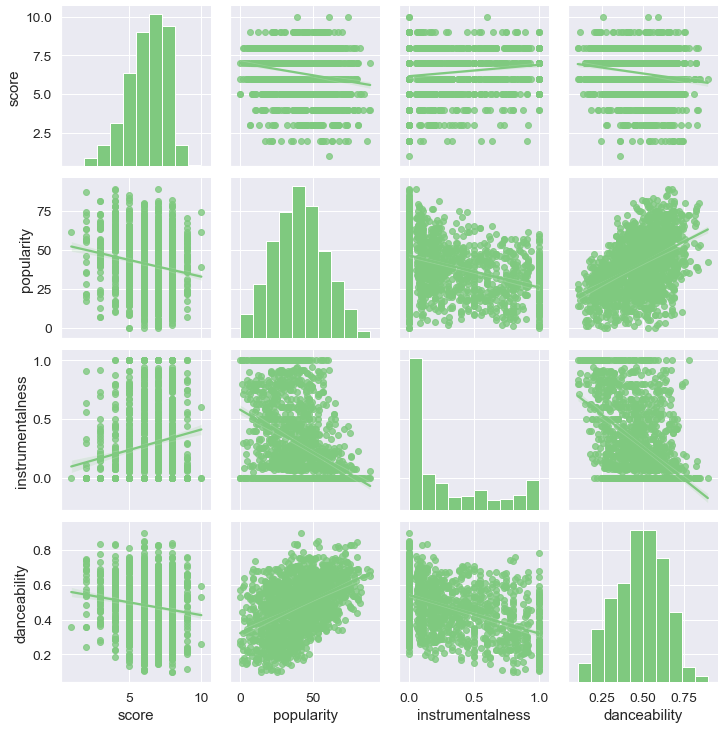

In [5]:
score_pair = sns.pairplot(data, vars=['score','popularity','instrumentalness','danceability'], kind='reg')

Let's explore what some other interesting feature correlations may be. These could become cross features for modeling.

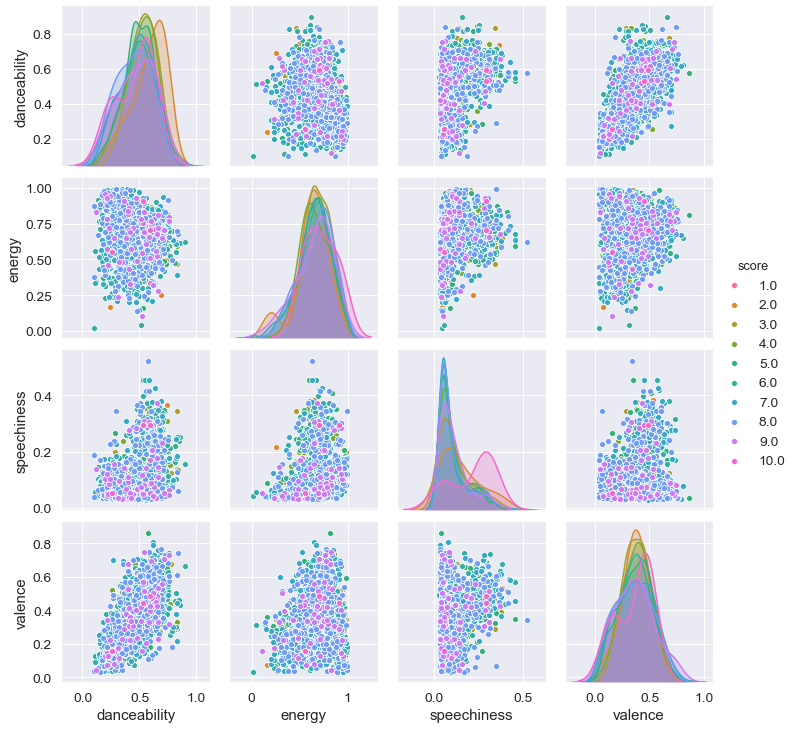

In [6]:
var_pair = sns.pairplot(data, vars=['danceability','energy','speechiness','valence'],hue='score')

# Step 3 - Gain some insight about the label ('score')

Let's look at a simple distribution plot of our scores. We can see from this graph that most scores fall between 5 and 8. Scores of 0, 1, and 10 are extremely rare.

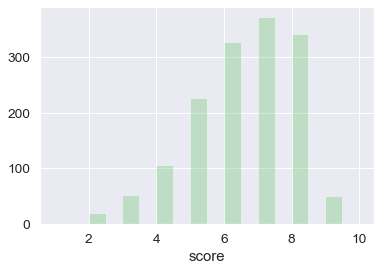

In [7]:
scores_hist = sns.distplot(data['score'], kde=False)

Next, let's compare our score to some specific features.

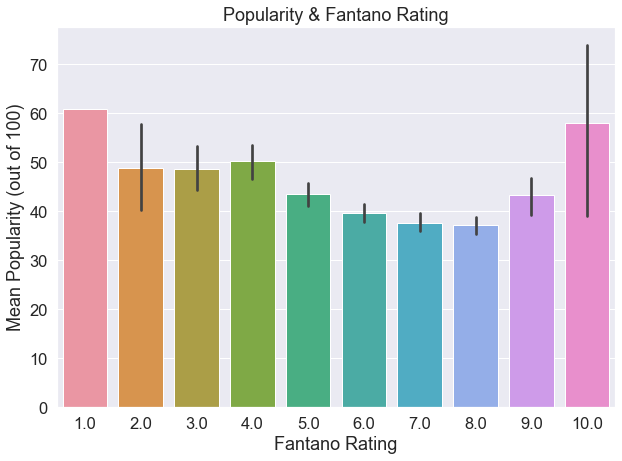

In [8]:
sns.set(font_scale=1.5)
sns.set_palette('Accent')

plt.figure(figsize=(10,7))
pop_rating = sns.barplot(x='score', y='popularity', data=data)
pop_rating.set(xlabel='Fantano Rating',ylabel='Mean Popularity (out of 100)')
pop_rating.set_title('Popularity & Fantano Rating')
plt.show()

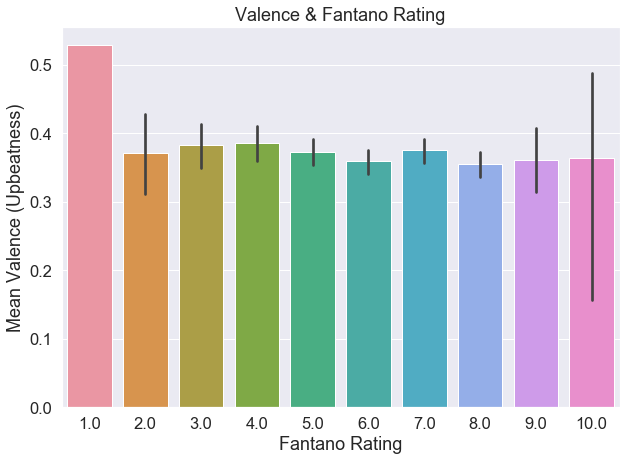

In [9]:
plt.figure(figsize=(10,7))
valence_rating = sns.barplot(x='score', y='valence', data=data)
valence_rating.set(xlabel='Fantano Rating',ylabel='Mean Valence (Upbeatness)')
valence_rating.set_title('Valence & Fantano Rating')
plt.show()

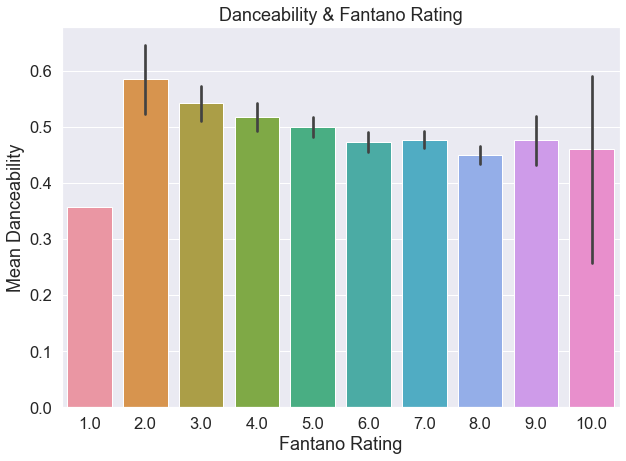

In [10]:
plt.figure(figsize=(10,7))
dance_rating = sns.barplot(x='score', y='danceability', data=data)
dance_rating.set(xlabel='Fantano Rating',ylabel='Mean Danceability')
dance_rating.set_title('Danceability & Fantano Rating')
plt.show()

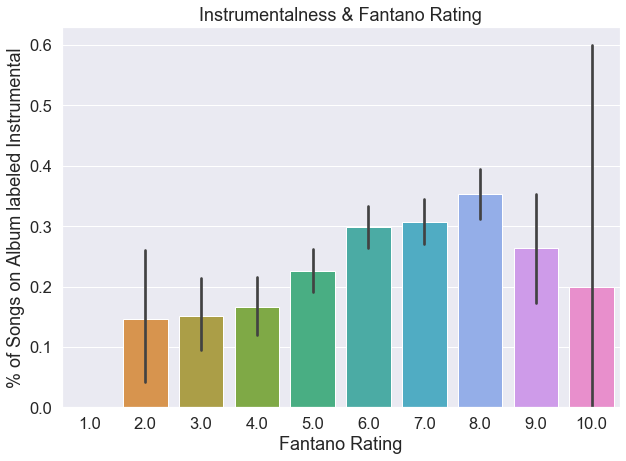

In [11]:
plt.figure(figsize=(10,7))
instrumentalness_rating = sns.barplot(x='score', y='instrumentalness', data=data)
instrumentalness_rating.set(xlabel='Fantano Rating',ylabel='% of Songs on Album labeled Instrumental')
instrumentalness_rating.set_title('Instrumentalness & Fantano Rating')
plt.show()